Hello!
My name is Ekaterina. I'm happy to review your project today.
When I will see mistake at the first time, I will just point it out. I let you find it and fix it by 
yourself. I'm trying to prepare you to work as an Data Analyst. SO, at a real job, your team lead 
will do the same. But if you can't handle this task yet, I will give you a more accurate hint at the 
next iteration.
You will find my comments below - please do not move, modify or delete them.
You can find my comments in green, yellow or red boxes like this:
<div class="alert alert-block alert-success"> <b>Reviewer's comment</b> <a 
class="tocSkip"></a>
Success. Everything is done succesfully. </div>
<div class="alert alert-block alert-warning"> <b>Reviewer's comment</b> <a 
class="tocSkip"></a>
Remarks. Some recommendations. </div>
<div class="alert alert-block alert-danger">
<b>Reviewer's comment</b> <a class="tocSkip"></a>
Needs fixing. The block requires some corrections. Work can't be accepted with the red 
comments. </div>
You can answer me by using this:
<div class="alert alert-block alert-info"> <b>Student answer.</b> <a class="tocSkip"></a> 
</div>


**Keep in mind that the project will be accepted only when all the “red” issues are resolved.**

<div class="alert alert-block alert-success">
    
<b>**General feedback**</b> <a class="tocSkip"></a>
    
1 Thank you for submitting your project!

2 There are things you've done great, here is what I liked most:
- good graphs in a consistent style.
- you have always followed the steps described in the task.
- nice primary data preprocessing


<span class="text-danger"> 
    
3 There are important issues that need to be solved:
    
  - check data for duplicates
  - create funnel graphs
  - use statistical z-test for checking the results of AB-test
</span>
    
I've left some other comments throughout the text, but in general the project is good and I have no doubt you'll make it perfect by the next iteration. Good luck!
</div>

<div class="alert alert-block alert-success">
    
<b>**General feedback v2**</b> <a class="tocSkip"></a>
    
Your corrections look great, you've improved your work significantly!

<span class="text-danger"> 
However, I have just one tiny correction to help you with
- it remains for us to calculate the results of the AB test, given that we conducted a multiple comparison.
</span>
    
One more time and you'll have it!
</div>

<div class="alert alert-block alert-success">
    
<b>**General feedback v3**</b> <a class="tocSkip"></a>
    
Thank you for your corrections!
    
Your project has passed code review.
    
Keep up the good work, and good luck on the next sprint!
</div>

<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Student's comment</b>
    
**Integrated Project 2 - Student Project**

<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Student's comment</b>
    
**Project Description:**

You work at a startup that sells food products. You need to investigate user behavior for the company's app.

First study the sales funnel. Find out how users reach the purchase stage. How many users actually make it to this stage? How many get stuck at previous stages? Which stages in particular?

Then look at the results of an A/A/B test. (Read on for more information about A/A/B testing.) The designers would like to change the fonts for the entire app, but the managers are afraid the users might find the new design intimidating. They decide to make a decision based on the results of an A/A/B test.

The users are split into three groups: two control groups get the old fonts and one test group gets the new ones. Find out which set of fonts produces better results.

Creating two A groups has certain advantages. We can make it a principle that we will only be confident in the accuracy of our testing when the two control groups are similar. If there are significant differences between the A groups, this can help us uncover factors that may be distorting the results. Comparing control groups also tells us how much time and data we'll need when running further tests.

You'll be using the same dataset for general analytics and for A/A/B analysis. In real projects, experiments are constantly being conducted. Analysts study the quality of an app using general data, without paying attention to whether users are participating in experiments.

<div class="alert alert-block alert-success"> <b>Reviewer's comment</b> <a 
class="tocSkip"></a>
Good project description </div>

<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Student's comment</b>
    
**Instructions for completing the project:**
    
**Step 1. Open the data file and read the general information**

In [114]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
from matplotlib import pyplot as plt
import datetime as dt
import scipy.stats as stats
from scipy.stats import ttest_ind
from scipy import stats as st
import matplotlib.pyplot as plt
import datetime as dt
from collections import Counter

In [115]:
data = pd.read_csv('/datasets/logs_exp_us.csv')
pd.set_option('display.max_colwidth', None)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 1 columns):
 #   Column                                       Non-Null Count   Dtype 
---  ------                                       --------------   ----- 
 0   EventName	DeviceIDHash	EventTimestamp	ExpId  244126 non-null  object
dtypes: object(1)
memory usage: 1.9+ MB


In [116]:
data

,EventName\tDeviceIDHash\tEventTimestamp\tExpId
0,MainScreenAppear\t4575588528974610257\t1564029816\t246
1,MainScreenAppear\t7416695313311560658\t1564053102\t246
2,PaymentScreenSuccessful\t3518123091307005509\t1564054127\t248
3,CartScreenAppear\t3518123091307005509\t1564054127\t248
4,PaymentScreenSuccessful\t6217807653094995999\t1564055322\t248
...,...
244121,MainScreenAppear\t4599628364049201812\t1565212345\t247
244122,MainScreenAppear\t5849806612437486590\t1565212439\t246
244123,MainScreenAppear\t5746969938801999050\t1565212483\t246
244124,MainScreenAppear\t5746969938801999050\t1565212498\t246


<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Student's comment</b>
    
**Instructions for completing the project:**
    
**Step 2. Prepare the data for analysis**
 
* Rename the columns in a way that's convenient for you.
    
* Check for missing values and data types. Correct the data if needed.
    
* Add a date and time column and a separate column for dates.

<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Student's comment</b>
    
Our first step for preparing the data would be to separate all the data from 1 column into 4 columns.

In [117]:
data['Data'] = data['EventName\tDeviceIDHash\tEventTimestamp\tExpId']

split_data = data['Data'].str.split('\t', n=3, expand=True)
split_data.columns = ['event_name', 'device_id_hash', 'event_timestamp', 'exp_id']
new_df = pd.concat([split_data], axis=1)
new_df

,event_name,device_id_hash,event_timestamp,exp_id
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248
...,...,...,...,...
244121,MainScreenAppear,4599628364049201812,1565212345,247
244122,MainScreenAppear,5849806612437486590,1565212439,246
244123,MainScreenAppear,5746969938801999050,1565212483,246
244124,MainScreenAppear,5746969938801999050,1565212498,246


<div class="alert alert-block alert-warning"> <b>Reviewer's comment</b> <a 
class="tocSkip"></a>
It's great that you separated the data by columns. However, this can be done more simply. Tabs were used as a separator when recording. So when opening csv we use this separator
    
    pd.read_csv('/datasets/logs_exp_us.csv',sep='\t')
    
    


</div>

In [118]:
new_df['event_timestamp']

0         1564029816
1         1564053102
2         1564054127
3         1564054127
4         1564055322
             ...    
244121    1565212345
244122    1565212439
244123    1565212483
244124    1565212498
244125    1565212517
Name: event_timestamp, Length: 244126, dtype: object

<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Student's comment</b>
    
Now we can work on changing the column types.

In [119]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   event_name       244126 non-null  object
 1   device_id_hash   244126 non-null  object
 2   event_timestamp  244126 non-null  object
 3   exp_id           244126 non-null  object
dtypes: object(4)
memory usage: 7.5+ MB


In [120]:
new_df['device_id_hash'] = new_df['device_id_hash'].astype('int64')
new_df['exp_id'] = new_df['exp_id'].astype('int64')
new_df['event_timestamp'] = pd.to_datetime(new_df['event_timestamp'], unit='s')

In [121]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   event_name       244126 non-null  object        
 1   device_id_hash   244126 non-null  int64         
 2   event_timestamp  244126 non-null  datetime64[ns]
 3   exp_id           244126 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 7.5+ MB


<div class="alert alert-block alert-success"> <b>Reviewer's comment</b> <a 
class="tocSkip"></a>
Excellent type conversion </div>

In [122]:
new_df = new_df.rename(columns={'device_id_hash': 'user_id', 'exp_id':'group_id'})
new_df

,event_name,user_id,event_timestamp,group_id
0,MainScreenAppear,4575588528974610257,2019-07-25 04:43:36,246
1,MainScreenAppear,7416695313311560658,2019-07-25 11:11:42,246
2,PaymentScreenSuccessful,3518123091307005509,2019-07-25 11:28:47,248
3,CartScreenAppear,3518123091307005509,2019-07-25 11:28:47,248
4,PaymentScreenSuccessful,6217807653094995999,2019-07-25 11:48:42,248
...,...,...,...,...
244121,MainScreenAppear,4599628364049201812,2019-08-07 21:12:25,247
244122,MainScreenAppear,5849806612437486590,2019-08-07 21:13:59,246
244123,MainScreenAppear,5746969938801999050,2019-08-07 21:14:43,246
244124,MainScreenAppear,5746969938801999050,2019-08-07 21:14:58,246


<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Student's comment</b>
    
Now that all our columns have the appropriate type and some clearer names, we can continue.

In [123]:
new_df.isna().sum()

event_name         0
user_id            0
event_timestamp    0
group_id           0
dtype: int64

<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Student's comment</b>
    
No missing values.

In [124]:
new_df['date'] = new_df['event_timestamp'].dt.date
new_df['date'] = pd.to_datetime(new_df['date'])
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   event_name       244126 non-null  object        
 1   user_id          244126 non-null  int64         
 2   event_timestamp  244126 non-null  datetime64[ns]
 3   group_id         244126 non-null  int64         
 4   date             244126 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(1)
memory usage: 9.3+ MB


In [125]:
new_df

,event_name,user_id,event_timestamp,group_id,date
0,MainScreenAppear,4575588528974610257,2019-07-25 04:43:36,246,2019-07-25
1,MainScreenAppear,7416695313311560658,2019-07-25 11:11:42,246,2019-07-25
2,PaymentScreenSuccessful,3518123091307005509,2019-07-25 11:28:47,248,2019-07-25
3,CartScreenAppear,3518123091307005509,2019-07-25 11:28:47,248,2019-07-25
4,PaymentScreenSuccessful,6217807653094995999,2019-07-25 11:48:42,248,2019-07-25
...,...,...,...,...,...
244121,MainScreenAppear,4599628364049201812,2019-08-07 21:12:25,247,2019-08-07
244122,MainScreenAppear,5849806612437486590,2019-08-07 21:13:59,246,2019-08-07
244123,MainScreenAppear,5746969938801999050,2019-08-07 21:14:43,246,2019-08-07
244124,MainScreenAppear,5746969938801999050,2019-08-07 21:14:58,246,2019-08-07


<div class="alert alert-block alert-danger">
<b>Reviewer's comment</b> <a class="tocSkip"></a>
    
~~Please add a check for duplicates in this step~~
</div>

In [126]:
new_df.duplicated().sum()

413

<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Student's comment</b>
    
We have 413 duplicates. We will drop the duplicate rows, since it is not possible for the same user to perform the same action at the same date and time.

In [127]:
new_df = new_df.drop_duplicates()

<div class="alert alert-block alert-success"> <b>Reviewer's comment v2</b> <a 
class="tocSkip"></a>
Done </div>

<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Student's comment</b>
    
**Instructions for completing the project:**
    
**Step 3. Study and check the data**
 
* How many events are in the logs?
    
* How many users are in the logs?
    
* What's the average number of events per user?
    
* What period of time does the data cover? Find the maximum and the minimum date. Plot a histogram by date and time. Can you be sure that you have equally complete data for the entire period? Older events could end up in some users' logs for technical reasons, and this could skew the overall picture. Find the moment at which the data starts to be complete and ignore the earlier section. What period does the data actually represent?
    
* Did you lose many events and users when excluding the older data?
    
* Make sure you have users from all three experimental groups.

In [128]:
new_df['event_name'].nunique()

5

<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Student's comment</b>
    
There are 5 different events in the logs.

In [129]:
new_df['user_id'].nunique()

7551

<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Student's comment</b>
    
There are 7551 unique users in the logs.

In [130]:
print(new_df.groupby(['user_id'])['event_name'].count().mean())

32.27559263673685


<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Student's comment</b>
    
We see that each user averages 32 events.

In [131]:
print(new_df['date'].min())
print(new_df['date'].max())

2019-07-25 00:00:00
2019-08-07 00:00:00


<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Student's comment</b>
    
We see that our data runs from July 25, 2019 up to August 7, 2019. So we have two weeks worth of data.

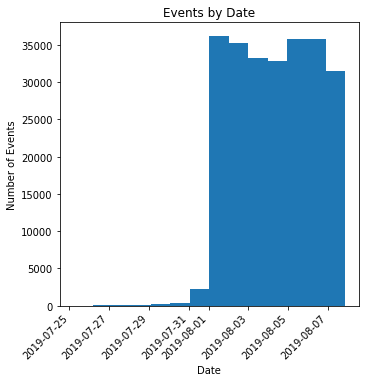

In [132]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.hist(new_df['event_timestamp'], bins=14)

plt.xticks(rotation=45, ha='right')
fig.tight_layout()
plt.title('Events by Date')
plt.xlabel('Date')
plt.ylabel('Number of Events')
plt.show()

<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Student's comment</b>
    
By looking at the histogram, we see that almost all of the events have been recorded in the last 7 days. Our cutoff point of data should be 2019-08-01. Anything that came before this date can skew our data.

<div class="alert alert-block alert-success"> <b>Reviewer's comment</b> <a 
class="tocSkip"></a>
Good histogram and right decision It can be assumed that before this date we had a problem in logging due to which some data was lost </div>

In [133]:
date_threshold = pd.to_datetime('2019-08-01')
filtered_df = new_df[new_df['date'] >= date_threshold]
filtered_df

,event_name,user_id,event_timestamp,group_id,date
2828,Tutorial,3737462046622621720,2019-08-01 00:07:28,246,2019-08-01
2829,MainScreenAppear,3737462046622621720,2019-08-01 00:08:00,246,2019-08-01
2830,MainScreenAppear,3737462046622621720,2019-08-01 00:08:55,246,2019-08-01
2831,OffersScreenAppear,3737462046622621720,2019-08-01 00:08:58,246,2019-08-01
2832,MainScreenAppear,1433840883824088890,2019-08-01 00:08:59,247,2019-08-01
...,...,...,...,...,...
244121,MainScreenAppear,4599628364049201812,2019-08-07 21:12:25,247,2019-08-07
244122,MainScreenAppear,5849806612437486590,2019-08-07 21:13:59,246,2019-08-07
244123,MainScreenAppear,5746969938801999050,2019-08-07 21:14:43,246,2019-08-07
244124,MainScreenAppear,5746969938801999050,2019-08-07 21:14:58,246,2019-08-07


In [134]:
filtered_df['user_id'].nunique()

7534

<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Student's comment</b>
    
By filtering our data, we lost 17 users. They are not significant enough to alter the way we continue.

In [135]:
print(new_df['event_name'].value_counts().sum())
print(filtered_df['event_name'].value_counts().sum())

243713
240887


<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Student's comment</b>
    
By filtering our data, we lost 2826 events, which account for roughly 1.16% of our data. Once again, it is not significant enough to alter the way we continue.

In [136]:
filtered_df['group_id'].nunique()

3

<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Student's comment</b>
    
All 3 groups are present in the filtered data.

<div class="alert alert-block alert-success"> <b>Reviewer's comment</b> <a 
class="tocSkip"></a>
Excellent analysis of filtered data </div>

<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Student's comment</b>
    
**Instructions for completing the project:**
    
**Step 4. Study the event funnel**
 
* See what events are in the logs and their frequency of occurrence. Sort them by frequency.
    
* Find the number of users who performed each of these actions. Sort the events by the number of users. Calculate the proportion of users who performed the action at least once.
    
* In what order do you think the actions took place. Are all of them part of a single sequence? You don't need to take them into account when calculating the funnel.
    
* Use the event funnel to find the share of users that proceed from each stage to the next. (For instance, for the sequence of events A → B → C, calculate the ratio of users at stage B to the number of users at stage A and the ratio of users at stage C to the number at stage B.)
    
* At what stage do you lose the most users?
    
* What share of users make the entire journey from their first event to payment?

MainScreenAppear           117328
OffersScreenAppear          46333
CartScreenAppear            42303
PaymentScreenSuccessful     33918
Tutorial                     1005
Name: event_name, dtype: int64


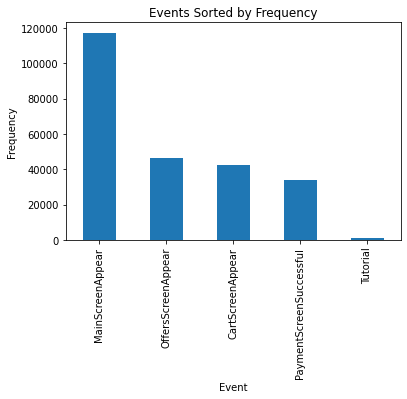

In [137]:
print(filtered_df['event_name'].value_counts())
filtered_df['event_name'].value_counts().plot(kind='bar')
plt.title('Events Sorted by Frequency')
plt.xlabel('Event')
plt.ylabel('Frequency')
plt.show()

<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Student's comment</b>
    
Looking at the table and graph above, we shouldn't be surprised to see that 'Main Screen Appear' appears most frequently. The order makes sense, though the difference between 'Cart Screen Appear' and 'Payment Screen Successful' is quite significant.

event_name
MainScreenAppear           7419
OffersScreenAppear         4593
CartScreenAppear           3734
PaymentScreenSuccessful    3539
Tutorial                    840
Name: user_id, dtype: int64


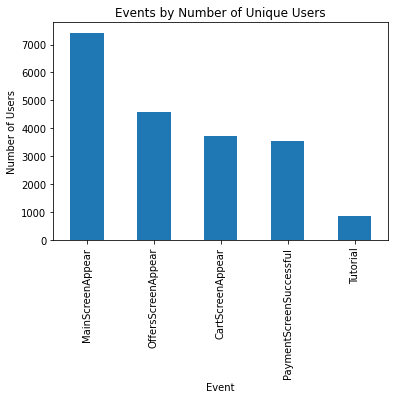

In [138]:
event_counts = filtered_df.groupby('event_name')['user_id'].nunique()
event_counts = event_counts.sort_values(ascending=False)
print(event_counts)
event_counts.plot(kind='bar')
plt.title('Events by Number of Unique Users')
plt.xlabel('Event')
plt.ylabel('Number of Users')
plt.show()

<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Student's comment</b>
    
From the table and graph above, we see that the event that had the most unique users was, once again, 'Main Screen Appear'. However, this time, the difference between 'Cart Screen Appear' and 'Payment Screen Successful' isn't as large (at least number-wise).

<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Student's comment</b>
    
To find out the number of users that performed all of the event types, we will use the 'set()' function.

In [139]:
events = set(filtered_df['event_name'].unique())
user_events = filtered_df.groupby('user_id')['event_name'].apply(set)

user_all_events = user_events == events

user_all_events.value_counts()

False    7068
True      466
Name: event_name, dtype: int64

<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Student's comment</b>
    
We found out that 466 users performed all the events, which is equal to 6.18%.

In [140]:
user_events_frozen = user_events.apply(frozenset)
user_events_frozen.value_counts()

(CartScreenAppear, MainScreenAppear, OffersScreenAppear, PaymentScreenSuccessful)              2963
(MainScreenAppear)                                                                             2701
(MainScreenAppear, OffersScreenAppear)                                                          784
(MainScreenAppear, OffersScreenAppear, Tutorial, CartScreenAppear, PaymentScreenSuccessful)     466
(MainScreenAppear, Tutorial)                                                                    181
(MainScreenAppear, OffersScreenAppear, Tutorial)                                                113
(CartScreenAppear, OffersScreenAppear, PaymentScreenSuccessful)                                  98
(CartScreenAppear, MainScreenAppear, OffersScreenAppear)                                         86
(CartScreenAppear, MainScreenAppear, OffersScreenAppear, Tutorial)                               65
(CartScreenAppear, MainScreenAppear)                                                             38


<div class="alert alert-block alert-danger">
<b>Reviewer's comment</b> <a class="tocSkip"></a>
    
~~We have a mistake here. Please fix it~~

</div>

<div class="alert alert-block alert-danger">
<b>Reviewer's comment</b> <a class="tocSkip"></a>
    
~~You are right, but nevertheless we cannot leave the code with errors in the project~~
</div>

<div class="alert alert-block alert-success"> <b>Reviewer's comment v2</b> <a 
class="tocSkip"></a>
Fixed </div>

<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Student's comment</b>
    
As we can see from the list of sequences, there is a multiple of event sequences that can occur. If we had to project one 'normal' sequence, it would be: 'Main Screen Appear'-->'Offers Screen Appear'-->'Cart Screen Appear'-->'Payment Screen Successful'. The tutorial is merely optional, and not really relevant.

<div class="alert alert-block alert-success"> <b>Reviewer's comment</b> <a 
class="tocSkip"></a>
Perfect conclusion </div>

In [141]:
event_counts

event_name
MainScreenAppear           7419
OffersScreenAppear         4593
CartScreenAppear           3734
PaymentScreenSuccessful    3539
Tutorial                    840
Name: user_id, dtype: int64

<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Student's comment</b>
    
To calculate the funnel progress share, we will create the event_counts as a series, with each event as part of the index.

In [142]:
event_counts = pd.Series([7419, 4593, 3734, 3539], index=['MainScreenAppear', 'OffersScreenAppear', 'CartScreenAppear', 'PaymentScreenSuccessful'])

main_to_offers_rate = event_counts['OffersScreenAppear'] / event_counts['MainScreenAppear']
offers_to_cart_rate = event_counts['CartScreenAppear'] / event_counts['OffersScreenAppear']
cart_to_payment_rate = event_counts['PaymentScreenSuccessful'] / event_counts['CartScreenAppear']
main_to_payment_rate = event_counts['PaymentScreenSuccessful'] / event_counts['MainScreenAppear']

print(f"MainScreenAppear to OffersScreenAppear conversion rate: {main_to_offers_rate:.2%}")
print(f"OffersScreenAppear to CartScreenAppear conversion rate: {offers_to_cart_rate:.2%}")
print(f"CartScreenAppear to PaymentScreenSuccessful conversion rate: {cart_to_payment_rate:.2%}")
print(f"MainScreenAppear to PaymentScreenSuccessful conversion rate: {main_to_payment_rate:.2%}")

MainScreenAppear to OffersScreenAppear conversion rate: 61.91%
OffersScreenAppear to CartScreenAppear conversion rate: 81.30%
CartScreenAppear to PaymentScreenSuccessful conversion rate: 94.78%
MainScreenAppear to PaymentScreenSuccessful conversion rate: 47.70%


<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Student's comment</b>
    
The more we progress in the funnel, the higher conversion rate we attain. This shows us that those who complete the 4 step funnel, are highly likely to purchase the product.
    
Most users are lost in the main to offers stage. It could be that the offers are not relevant to them and they give up.
    
47.7% of users make through the entire funnel (main-->offer-->cart-->payment).

<div class="alert alert-block alert-success"> <b>Reviewer's comment</b> <a 
class="tocSkip"></a>
Exactly </div>

<div class="alert alert-block alert-danger">
<b>Reviewer's comment</b> <a class="tocSkip"></a>
    
~~Please create the funnel graphs at this step~~ 
    
~~You can use plotly~~ 
</div>

In [143]:
#REVIEWER CODE thanks for the help
import plotly.express as px
res = event_counts.reset_index().rename(columns = {'index':'event', 0:'number_of_users'})
fig=px.funnel(res,y='event',x= 'number_of_users')
fig.show()

<div class="alert alert-block alert-success"> <b>Reviewer's comment v2</b> <a 
class="tocSkip"></a>
Perfect </div>

<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Student's comment</b>
    
**Instructions for completing the project:**
    
**Step 5. Study the results of the experiment**
 
* How many users are there in each group?
    
* We have two control groups in the A/A test, where we check our mechanisms and calculations. See if there is a statistically significant difference between samples 246 and 247.
    
* Select the most popular event. In each of the control groups, find the number of users who performed this action. Find their share. Check whether the difference between the groups is statistically significant. Repeat the procedure for all other events (it will save time if you create a special function for this test). Can you confirm that the groups were split properly?
    
* Do the same thing for the group with altered fonts. Compare the results with those of each of the control groups for each event in isolation. Compare the results with the combined results for the control groups. What conclusions can you draw from the experiment?
    
* What significance level have you set to test the statistical hypotheses mentioned above? Calculate how many statistical hypothesis tests you carried out. With a statistical significance level of 0.1, one in 10 results could be false. What should the significance level be? If you want to change it, run through the previous steps again and check your conclusions.

In [144]:
filtered_df

,event_name,user_id,event_timestamp,group_id,date
2828,Tutorial,3737462046622621720,2019-08-01 00:07:28,246,2019-08-01
2829,MainScreenAppear,3737462046622621720,2019-08-01 00:08:00,246,2019-08-01
2830,MainScreenAppear,3737462046622621720,2019-08-01 00:08:55,246,2019-08-01
2831,OffersScreenAppear,3737462046622621720,2019-08-01 00:08:58,246,2019-08-01
2832,MainScreenAppear,1433840883824088890,2019-08-01 00:08:59,247,2019-08-01
...,...,...,...,...,...
244121,MainScreenAppear,4599628364049201812,2019-08-07 21:12:25,247,2019-08-07
244122,MainScreenAppear,5849806612437486590,2019-08-07 21:13:59,246,2019-08-07
244123,MainScreenAppear,5746969938801999050,2019-08-07 21:14:43,246,2019-08-07
244124,MainScreenAppear,5746969938801999050,2019-08-07 21:14:58,246,2019-08-07


In [145]:
filtered_df['group_id'].value_counts()

248    84563
246    79302
247    77022
Name: group_id, dtype: int64

<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Student's comment</b>
    
From the table above, we see that group 246 has 79302 users, group 247 has 77022 users, and group 248 has 84563 users.

<div class="alert alert-block alert-danger">
<b>Reviewer's comment</b> <a class="tocSkip"></a>
    
~~Let's count here not the number of events by groups, but unique users~~
</div>

<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Student's comment</b>
    
Was done in cell 80.

<div class="alert alert-block alert-success"> <b>Reviewer's comment v2</b> <a 
class="tocSkip"></a>
Ok </div>

In [146]:
group_246 = filtered_df[filtered_df['group_id'] == 246]
group_247 = filtered_df[filtered_df['group_id'] == 247]
group_248 = filtered_df[filtered_df['group_id'] == 248]

<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Student's comment</b>
    
Let's conduct and A/A test between groups 246 and 247, and make sure there is no significant statistical difference.

In [147]:
user_difference = (group_246['user_id'].count() - group_247['user_id'].count()) / group_246['user_id'].count()
user_difference

0.028750851176515095

<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Student's comment</b>
    
We see that the difference between the number of users is 2.86%. This is in contrast to what constitutes a successful A/A test (the number of users in different groups doesn't vary by more than 1%).

In [148]:
print(group_246['event_name'].value_counts())
print(group_247['event_name'].value_counts())

MainScreenAppear           37676
OffersScreenAppear         14767
CartScreenAppear           14690
PaymentScreenSuccessful    11852
Tutorial                     317
Name: event_name, dtype: int64
MainScreenAppear           39090
OffersScreenAppear         15179
CartScreenAppear           12434
PaymentScreenSuccessful     9981
Tutorial                     338
Name: event_name, dtype: int64


<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Student's comment</b>
    
For both groups the most popular event was 'Main Screen Appear'. 

In [149]:
main_screen_users_246 = group_246[group_246['event_name'] == 'MainScreenAppear']
main_screen_users_246['user_id'].nunique()

2450

In [150]:
main_screen_users_247 = group_247[group_247['event_name'] == 'MainScreenAppear']
main_screen_users_247['user_id'].nunique()

2476

<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Student's comment</b>
    
For the 'Main Screen Appear' event, group 246 and group 247 had 2450 and 2476 users, respectively.

In [151]:
main_screen_rate = (main_screen_users_246['user_id'].nunique() - main_screen_users_247['user_id'].nunique()) / main_screen_users_246['user_id'].nunique()
main_screen_rate

-0.010612244897959184

<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Student's comment</b>
    
For the 'Main Screen Appear' event, we have a negative difference of 1.06%.

In [152]:
offers_screen_users_246 = group_246[group_246['event_name'] == 'OffersScreenAppear']
offers_screen_users_246['user_id'].nunique()

1542

In [153]:
offers_screen_users_247 = group_247[group_247['event_name'] == 'OffersScreenAppear']
offers_screen_users_247['user_id'].nunique()

1520

In [154]:
offers_screen_rate = (offers_screen_users_246['user_id'].nunique() - offers_screen_users_247['user_id'].nunique()) / offers_screen_users_246['user_id'].nunique()
offers_screen_rate

0.014267185473411154

<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Student's comment</b>
    
For the 'Offers Screen Appear' event, we have a difference of 1.42%. It is still a bit above our 1% desired threshold.

In [155]:
cart_screen_users_246 = group_246[group_246['event_name'] == 'CartScreenAppear']
cart_screen_users_246['user_id'].nunique()

1266

In [156]:
cart_screen_users_247 = group_247[group_247['event_name'] == 'CartScreenAppear']
cart_screen_users_247['user_id'].nunique()

1238

In [157]:
cart_screen_rate = (cart_screen_users_246['user_id'].nunique() - cart_screen_users_247['user_id'].nunique()) / cart_screen_users_246['user_id'].nunique()
cart_screen_rate

0.022116903633491312

<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Student's comment</b>
    
For the 'Cart Screen Appear' event, we have a difference of 2.21%. It is still above our 1% desired threshold.

In [158]:
payment_screen_users_246 = group_246[group_246['event_name'] == 'PaymentScreenSuccessful']
payment_screen_users_246['user_id'].nunique()

1200

In [159]:
payment_screen_users_247 = group_247[group_247['event_name'] == 'PaymentScreenSuccessful']
payment_screen_users_247['user_id'].nunique()

1158

In [160]:
payment_screen_rate = (payment_screen_users_246['user_id'].nunique() - payment_screen_users_247['user_id'].nunique()) / payment_screen_users_246['user_id'].nunique()
payment_screen_rate

0.035

<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Student's comment</b>
    
For the 'Payment Screen Successful' event, we have a difference of 3.5%. It is still above our 1% desired threshold.

In [161]:
tutorial_screen_users_246 = group_246[group_246['event_name'] == 'Tutorial']
tutorial_screen_users_246['user_id'].nunique()

278

In [162]:
tutorial_screen_users_247 = group_247[group_247['event_name'] == 'Tutorial']
tutorial_screen_users_247['user_id'].nunique()

283

In [163]:
tutorial_screen_rate = (tutorial_screen_users_246['user_id'].nunique() - tutorial_screen_users_247['user_id'].nunique()) / tutorial_screen_users_246['user_id'].nunique()
tutorial_screen_rate

-0.017985611510791366

<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Student's comment</b>
    
For the 'Tutorial' event, we have a negative difference of 1.79%.

<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Student's comment</b>
    
By comparing the rates between our two alleged control groups (246 and 247), we keep getting results above our desired threshold (although not by much). However, since the events after 'Main Screen Appear) are significantly lower in number, we won't read too much into these difference, and determine that groups 246 and 247 were in fact split properly.

In [164]:
main_screen_users_248 = group_248[group_248['event_name'] == 'MainScreenAppear']
main_screen_users_248['user_id'].nunique()

2493

In [165]:
main_screen_rate_68 = (main_screen_users_246['user_id'].nunique() - main_screen_users_248['user_id'].nunique()) / main_screen_users_246['user_id'].nunique()
main_screen_rate_68

-0.017551020408163264

In [166]:
main_screen_rate_78 = (main_screen_users_247['user_id'].nunique() - main_screen_users_248['user_id'].nunique()) / main_screen_users_247['user_id'].nunique()
main_screen_rate_78

-0.006865912762520194

<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Student's comment</b>
    
For the 'Main Screen Appear' event, we have a negative difference of 1.75% compared with group 246, and a negative 0.68% difference compared with group 247.

In [167]:
offers_screen_users_248 = group_248[group_248['event_name'] == 'OffersScreenAppear']
offers_screen_users_248['user_id'].nunique()

1531

In [168]:
offers_screen_rate_68 = (offers_screen_users_246['user_id'].nunique() - offers_screen_users_248['user_id'].nunique()) / offers_screen_users_246['user_id'].nunique()
offers_screen_rate_68

0.007133592736705577

In [169]:
offers_screen_rate_78 = (offers_screen_users_247['user_id'].nunique() - offers_screen_users_248['user_id'].nunique()) / offers_screen_users_247['user_id'].nunique()
offers_screen_rate_78

-0.007236842105263158

<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Student's comment</b>
    
For the 'Offers Screen Appear' event, we have a difference of 0.71% compared with group 246, and a negative 0.72% difference compared with group 247.

In [170]:
cart_screen_users_248 = group_248[group_248['event_name'] == 'CartScreenAppear']
cart_screen_users_248['user_id'].nunique()

1230

In [171]:
cart_screen_rate_68 = (cart_screen_users_246['user_id'].nunique() - cart_screen_users_248['user_id'].nunique()) / cart_screen_users_246['user_id'].nunique()
cart_screen_rate_68

0.02843601895734597

In [172]:
cart_screen_rate_78 = (cart_screen_users_247['user_id'].nunique() - cart_screen_users_248['user_id'].nunique()) / cart_screen_users_247['user_id'].nunique()
cart_screen_rate_78

0.006462035541195477

<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Student's comment</b>
    
For the 'Cart Screen Appear' event, we have a difference of 2.84% compared with group 246, and a 0.64% difference compared with group 247.

In [173]:
payment_screen_users_248 = group_248[group_248['event_name'] == 'PaymentScreenSuccessful']
payment_screen_users_248['user_id'].nunique()

1181

In [174]:
payment_screen_rate_68 = (payment_screen_users_246['user_id'].nunique() - payment_screen_users_248['user_id'].nunique()) / payment_screen_users_246['user_id'].nunique()
payment_screen_rate_68

0.015833333333333335

In [175]:
payment_screen_rate_78 = (payment_screen_users_247['user_id'].nunique() - payment_screen_users_248['user_id'].nunique()) / payment_screen_users_247['user_id'].nunique()
payment_screen_rate_78

-0.019861830742659757

<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Student's comment</b>
    
For the 'Payment Screen Successful' event, we have a difference of 1.58% compared with group 246, and a negative 1.98% difference compared with group 247.

In [176]:
tutorial_screen_users_248 = group_248[group_248['event_name'] == 'Tutorial']
tutorial_screen_users_248['user_id'].nunique()

279

In [177]:
tutorial_screen_rate_68 = (tutorial_screen_users_246['user_id'].nunique() - tutorial_screen_users_248['user_id'].nunique()) / tutorial_screen_users_246['user_id'].nunique()
tutorial_screen_rate_68

-0.0035971223021582736

In [178]:
tutorial_screen_rate_78 = (tutorial_screen_users_247['user_id'].nunique() - tutorial_screen_users_248['user_id'].nunique()) / tutorial_screen_users_247['user_id'].nunique()
tutorial_screen_rate_78

0.014134275618374558

<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Student's comment</b>
    
For the 'Tutorial' event, we have a negative difference of 0.36% compared with group 246, and a 1.41% difference compared with group 247.

In [179]:
print(f"MainScreenAppear group 246 vs 248 rate: {main_screen_rate_68:.2%}")
print(f"MainScreenAppear group 247 vs 248 rate: {main_screen_rate_78:.2%}")
print(f"OffersScreenAppear group 246 vs 248 rate: {offers_screen_rate_68:.2%}")
print(f"OffersScreenAppear group 247 vs 248 rate: {offers_screen_rate_78:.2%}")
print(f"CartScreenAppear group 246 vs 248 rate: {cart_screen_rate_68:.2%}")
print(f"CartScreenAppear group 247 vs 248 rate: {cart_screen_rate_78:.2%}")
print(f"PaymentScreenSuccessful group 246 vs 248 rate: {payment_screen_rate_68:.2%}")
print(f"PaymentScreenSuccessful group 247 vs 248 rate: {payment_screen_rate_78:.2%}")
print(f"Tutorial group 246 vs 248 rate: {tutorial_screen_rate_68:.2%}")
print(f"Tutorial group 247 vs 248 rate: {tutorial_screen_rate_78:.2%}")

MainScreenAppear group 246 vs 248 rate: -1.76%
MainScreenAppear group 247 vs 248 rate: -0.69%
OffersScreenAppear group 246 vs 248 rate: 0.71%
OffersScreenAppear group 247 vs 248 rate: -0.72%
CartScreenAppear group 246 vs 248 rate: 2.84%
CartScreenAppear group 247 vs 248 rate: 0.65%
PaymentScreenSuccessful group 246 vs 248 rate: 1.58%
PaymentScreenSuccessful group 247 vs 248 rate: -1.99%
Tutorial group 246 vs 248 rate: -0.36%
Tutorial group 247 vs 248 rate: 1.41%


<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Student's comment</b>
    
By comparing the rates between the control groups (each compared separately) and our test group, we don't see too much of a difference when we compare the rates during each stage of the funnel.

<div class="alert alert-block alert-danger">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

~~Thank you very much for all the above calculations, but we define the results of the AB test a little differently~~
    
~~First we formulate null and an alternative hypothesises For example~~
    
~~H0:The null hypothesis - samples 246 and 247 are statistical equal.~~
    
~~H1:The alternative hypothesis - samples 246 and 247 have statistical significance difference.~~
    
~~In this case, statistical significance is determined using a statistical test (in our case, a z-test, because we determine the difference in shares)  Notice that it is not 1% threshold.~~
    


<div class="alert alert-block alert-danger">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

~~Second we calculate p-value and choose alpha If p-value > alpha we cqn not reject H0 that means the groups are statistically the same.~~

<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Student's comment</b>
    
The null hypothesis is that groups 246 and 247 are statistically equal.
    
The alternative hypothesis is that groups 246 and 247 have a significant statistical difference.

In [180]:
#REVIEWER CODE thank again
res=filtered_df.pivot_table(index='event_name', columns='group_id',values='user_id',aggfunc='nunique').reset_index()
res

group_id,event_name,246,247,248
0,CartScreenAppear,1266,1238,1230
1,MainScreenAppear,2450,2476,2493
2,OffersScreenAppear,1542,1520,1531
3,PaymentScreenSuccessful,1200,1158,1181
4,Tutorial,278,283,279


In [181]:
#REVIEWER CODE thanks again
from statsmodels.stats.proportion import proportions_ztest
def check_hypothesis(group1,group2,event,alpha=0.05):
    success1=res[res.event_name==event][group1].iloc[0]
    success2=res[res.event_name==event][group2].iloc[0]
    
    trials1=filtered_df[filtered_df.group_id==group1]['user_id'].nunique()
    trials2=filtered_df[filtered_df.group_id==group2]['user_id'].nunique()
   
    p_value=proportions_ztest([success1,success2], [trials1,trials2])[1]

    print('Proportion of',group1,":",success1/trials1)
    print('Proportion of',group2,":",success2/trials2)
    print('p-value: ', p_value)

    if (p_value < alpha):
        print("Rejecting the null hypothesis for", event,"and groups", group1,group2)
    else:
        print("Failed to reject the null hypothesis for",event,"and groups", group1,group2 )
        
check_hypothesis(246,247,'CartScreenAppear',alpha=0.05)
    

Proportion of 246 : 0.5096618357487923
Proportion of 247 : 0.4926382809391166
p-value:  0.22883372237997213
Failed to reject the null hypothesis for CartScreenAppear and groups 246 247


<div class="alert alert-block alert-danger">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

~~So we have to make the same calculations for each combination of groups and for each type of event plus for combined control groups (246+247) and test group (248)~~ 

In [182]:
check_hypothesis(246,248,'CartScreenAppear',alpha=0.05)

Proportion of 246 : 0.5096618357487923
Proportion of 248 : 0.48482459597950334
p-value:  0.07842923237520125
Failed to reject the null hypothesis for CartScreenAppear and groups 246 248


In [183]:
check_hypothesis(247,248,'CartScreenAppear',alpha=0.05)

Proportion of 247 : 0.4926382809391166
Proportion of 248 : 0.48482459597950334
p-value:  0.5786197879539782
Failed to reject the null hypothesis for CartScreenAppear and groups 247 248


<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Student's comment</b>
    
For the 'CartScreenAppear' event, we see that we failed to reject the null hypothesis for each group combination.

In [184]:
check_hypothesis(246,247,'MainScreenAppear',alpha=0.05)

Proportion of 246 : 0.9863123993558777
Proportion of 247 : 0.9852765618782332
p-value:  0.7570597232046099
Failed to reject the null hypothesis for MainScreenAppear and groups 246 247


In [185]:
check_hypothesis(246,248,'MainScreenAppear',alpha=0.05)

Proportion of 246 : 0.9863123993558777
Proportion of 248 : 0.9826566811194324
p-value:  0.2949721933554553
Failed to reject the null hypothesis for MainScreenAppear and groups 246 248


In [186]:
check_hypothesis(247,248,'MainScreenAppear',alpha=0.05)

Proportion of 247 : 0.9852765618782332
Proportion of 248 : 0.9826566811194324
p-value:  0.45870536166215137
Failed to reject the null hypothesis for MainScreenAppear and groups 247 248


<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Student's comment</b>
    
For the 'MainScreenAppear' event, we see that we failed to reject the null hypothesis for each group combination.

In [187]:
check_hypothesis(246,247,'OffersScreenAppear',alpha=0.05)

Proportion of 246 : 0.6207729468599034
Proportion of 247 : 0.6048547552725826
p-value:  0.2480954578522181
Failed to reject the null hypothesis for OffersScreenAppear and groups 246 247


In [188]:
check_hypothesis(246,248,'OffersScreenAppear',alpha=0.05)

Proportion of 246 : 0.6207729468599034
Proportion of 248 : 0.6034686637761135
p-value:  0.20836205402738917
Failed to reject the null hypothesis for OffersScreenAppear and groups 246 248


In [189]:
check_hypothesis(247,248,'OffersScreenAppear',alpha=0.05)

Proportion of 247 : 0.6048547552725826
Proportion of 248 : 0.6034686637761135
p-value:  0.919781783059226
Failed to reject the null hypothesis for OffersScreenAppear and groups 247 248


<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Student's comment</b>
    
For the 'OffersScreenAppear' event, we see that we failed to reject the null hypothesis for each group combination.

In [190]:
check_hypothesis(246,247,'PaymentScreenSuccessful',alpha=0.05)

Proportion of 246 : 0.4830917874396135
Proportion of 247 : 0.46080382013529647
p-value:  0.11456679313141847
Failed to reject the null hypothesis for PaymentScreenSuccessful and groups 246 247


In [191]:
check_hypothesis(246,248,'PaymentScreenSuccessful',alpha=0.05)

Proportion of 246 : 0.4830917874396135
Proportion of 248 : 0.46551044540796216
p-value:  0.21225532756977972
Failed to reject the null hypothesis for PaymentScreenSuccessful and groups 246 248


In [192]:
check_hypothesis(247,248,'PaymentScreenSuccessful',alpha=0.05)

Proportion of 247 : 0.46080382013529647
Proportion of 248 : 0.46551044540796216
p-value:  0.7373415053803964
Failed to reject the null hypothesis for PaymentScreenSuccessful and groups 247 248


<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Student's comment</b>
    
For the 'PaymentScreenSuccessful' event, we see that we failed to reject the null hypothesis for each group combination.

In [234]:
check_hypothesis(246,247,'Tutorial',alpha=0.05)

Proportion of 246 : 0.11191626409017713
Proportion of 247 : 0.11261440509351373
p-value:  0.9376996189257114
Failed to reject the null hypothesis for Tutorial and groups 246 247


In [194]:
check_hypothesis(246,248,'Tutorial',alpha=0.05)

Proportion of 246 : 0.11191626409017713
Proportion of 248 : 0.10997240835632636
p-value:  0.8264294010087645
Failed to reject the null hypothesis for Tutorial and groups 246 248


In [195]:
check_hypothesis(247,248,'Tutorial',alpha=0.05)

Proportion of 247 : 0.11261440509351373
Proportion of 248 : 0.10997240835632636
p-value:  0.7653239224745011
Failed to reject the null hypothesis for Tutorial and groups 247 248


<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Student's comment</b>
    
For the 'Tutorial' event, we see that we failed to reject the null hypothesis for each group combination.

In [196]:
res

group_id,event_name,246,247,248
0,CartScreenAppear,1266,1238,1230
1,MainScreenAppear,2450,2476,2493
2,OffersScreenAppear,1542,1520,1531
3,PaymentScreenSuccessful,1200,1158,1181
4,Tutorial,278,283,279


<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Student's comment</b>
    
In order to compare the combined control groups (246 and 247) with the test group (248), we need to add a cumulative column in the res table (using a simple arithmetic function) and filtered_df data frame (using lambda and a boolean condition).

In [197]:
res['control_groups'] = res[246] + res[247]
res

group_id,event_name,246,247,248,control_groups
0,CartScreenAppear,1266,1238,1230,2504
1,MainScreenAppear,2450,2476,2493,4926
2,OffersScreenAppear,1542,1520,1531,3062
3,PaymentScreenSuccessful,1200,1158,1181,2358
4,Tutorial,278,283,279,561


In [198]:
group_type = filtered_df['group_id'].apply(lambda x: 'control' if x==246 or x== 247 else 'test' )
filtered_df.loc[:, ('group_type')] = group_type

/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1597: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [199]:
#trials=filtered_df[filtered_df.group_id==246  or filtered_df.group_id==247]['user_id'].nunique()
filtered_df
trials2=filtered_df[filtered_df.group_id==247]['user_id'].nunique()
trials2

2513

<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Student's comment</b>
    
The null hypothesis is that there is no significant statistical difference between the control and test groups.
    
The alternative hypothesis is that there is a significant statistical difference between the control and test groups.

In [200]:
def check_hypothesis2(event,alpha=0.05):
    success_control=res[res.event_name==event]['control_groups'].iloc[0]
    success_test=res[res.event_name==event][248].iloc[0]
    
    trials_control=filtered_df[filtered_df.group_type=='control']['user_id'].nunique()
    trials_test=filtered_df[filtered_df.group_type=='test']['user_id'].nunique()
   
    p_value=proportions_ztest([success_control,success_test], [trials_control,trials_test])[1]

    print('Proportion of','control_groups',":",success_control/trials_control)
    print('Proportion of',248,":",success_test/trials_test)
    print('p-value: ', p_value)

    if (p_value < alpha):
        print("Rejecting the null hypothesis for", event,"and groups", 'control_groups',248)
    else:
        print("Failed to reject the null hypothesis for",event,"and 'control_groups'",248)
        
check_hypothesis2('CartScreenAppear',alpha=0.05)

Proportion of control_groups : 0.5011006603962378
Proportion of 248 : 0.48482459597950334
p-value:  0.18175875284404386
Failed to reject the null hypothesis for CartScreenAppear and 'control_groups' 248


In [201]:
check_hypothesis2('MainScreenAppear',alpha=0.05)

Proportion of control_groups : 0.9857914748849309
Proportion of 248 : 0.9826566811194324
p-value:  0.29424526837179577
Failed to reject the null hypothesis for MainScreenAppear and 'control_groups' 248


In [202]:
check_hypothesis2('OffersScreenAppear',alpha=0.05)

Proportion of control_groups : 0.6127676605963578
Proportion of 248 : 0.6034686637761135
p-value:  0.43425549655188245
Failed to reject the null hypothesis for OffersScreenAppear and 'control_groups' 248


In [203]:
check_hypothesis2('PaymentScreenSuccessful',alpha=0.05)

Proportion of control_groups : 0.47188312987792674
Proportion of 248 : 0.46551044540796216
p-value:  0.6004294282308703
Failed to reject the null hypothesis for PaymentScreenSuccessful and 'control_groups' 248


In [204]:
check_hypothesis2('Tutorial',alpha=0.05)

Proportion of control_groups : 0.11226736041624975
Proportion of 248 : 0.10997240835632636
p-value:  0.764862472531507
Failed to reject the null hypothesis for Tutorial and 'control_groups' 248


<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Student's comment</b>
    
For each event, we see that we failed to reject the null hypothesis for the control and test groups.

<div class="alert alert-block alert-success"> <b>Reviewer's comment v2</b> <a 
class="tocSkip"></a>
Now you correctly calculate the results of the AB test Super!</div>

<div class="alert alert-block alert-danger">
<b>Reviewer's comment</b> <a class="tocSkip"></a>
    
~~As you can see, we used alpha = 0.05 in the check_hypothesis function, so you just need to run the same tests with alpha = 0.1.~~
    
~~And do not forget about the adjustments for multiple comparison Here some information~~ https://towardsdatascience.com/multiple-comparison-a-common-pitfall-for-a-b-testing-d773f19a4a95

<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Student's comment</b>
    
Now we will run the same tests, but this time with alpha=0.1.

In [235]:
#REVIEWER CODE thanks again
from statsmodels.stats.proportion import proportions_ztest
def check_hypothesis3(group1,group2,event,alpha=0.1):
    success1=res[res.event_name==event][group1].iloc[0]
    success2=res[res.event_name==event][group2].iloc[0]
    
    trials1=filtered_df[filtered_df.group_id==group1]['user_id'].nunique()
    trials2=filtered_df[filtered_df.group_id==group2]['user_id'].nunique()
   
    p_value=proportions_ztest([success1,success2], [trials1,trials2])[1]

    print('Proportion of',group1,":",success1/trials1)
    print('Proportion of',group2,":",success2/trials2)
    print('p-value: ', p_value)

    if (p_value < alpha):
        print("Rejecting the null hypothesis for", event,"and groups", group1,group2)
    else:
        print("Failed to reject the null hypothesis for",event,"and groups", group1,group2 )
        
check_hypothesis(246,247,'CartScreenAppear',alpha=0.1)
    

Proportion of 246 : 0.5096618357487923
Proportion of 247 : 0.4926382809391166
p-value:  0.22883372237997213
Failed to reject the null hypothesis for CartScreenAppear and groups 246 247


In [206]:
check_hypothesis(246,248,'CartScreenAppear',alpha=0.1)

Proportion of 246 : 0.5096618357487923
Proportion of 248 : 0.48482459597950334
p-value:  0.07842923237520125
Rejecting the null hypothesis for CartScreenAppear and groups 246 248


In [207]:
check_hypothesis(247,248,'CartScreenAppear',alpha=0.1)

Proportion of 247 : 0.4926382809391166
Proportion of 248 : 0.48482459597950334
p-value:  0.5786197879539782
Failed to reject the null hypothesis for CartScreenAppear and groups 247 248


<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Student's comment</b>
    
For the 'CartScreenAppear' event, we reject the null hypothesis in groups 246 and 248, However, we fail to reject it for groups 247 and 248.

In [208]:
check_hypothesis(246,247,'MainScreenAppear',alpha=0.1)

Proportion of 246 : 0.9863123993558777
Proportion of 247 : 0.9852765618782332
p-value:  0.7570597232046099
Failed to reject the null hypothesis for MainScreenAppear and groups 246 247


In [209]:
check_hypothesis(246,248,'MainScreenAppear',alpha=0.1)

Proportion of 246 : 0.9863123993558777
Proportion of 248 : 0.9826566811194324
p-value:  0.2949721933554553
Failed to reject the null hypothesis for MainScreenAppear and groups 246 248


In [210]:
check_hypothesis(247,248,'MainScreenAppear',alpha=0.1)

Proportion of 247 : 0.9852765618782332
Proportion of 248 : 0.9826566811194324
p-value:  0.45870536166215137
Failed to reject the null hypothesis for MainScreenAppear and groups 247 248


<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Student's comment</b>
    
For the 'MainScreenAppear' event, we fail to reject the null hypothesis in all group combinations.

In [211]:
check_hypothesis(246,247,'OffersScreenAppear',alpha=0.1)

Proportion of 246 : 0.6207729468599034
Proportion of 247 : 0.6048547552725826
p-value:  0.2480954578522181
Failed to reject the null hypothesis for OffersScreenAppear and groups 246 247


In [212]:
check_hypothesis(246,248,'OffersScreenAppear',alpha=0.1)

Proportion of 246 : 0.6207729468599034
Proportion of 248 : 0.6034686637761135
p-value:  0.20836205402738917
Failed to reject the null hypothesis for OffersScreenAppear and groups 246 248


In [213]:
check_hypothesis(247,248,'OffersScreenAppear',alpha=0.1)

Proportion of 247 : 0.6048547552725826
Proportion of 248 : 0.6034686637761135
p-value:  0.919781783059226
Failed to reject the null hypothesis for OffersScreenAppear and groups 247 248


<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Student's comment</b>
    
For the 'OffersScreenAppear' event, we fail to reject the null hypothesis in all group combinations.

In [214]:
check_hypothesis(246,247,'PaymentScreenSuccessful',alpha=0.1)

Proportion of 246 : 0.4830917874396135
Proportion of 247 : 0.46080382013529647
p-value:  0.11456679313141847
Failed to reject the null hypothesis for PaymentScreenSuccessful and groups 246 247


In [215]:
check_hypothesis(246,248,'PaymentScreenSuccessful',alpha=0.1)

Proportion of 246 : 0.4830917874396135
Proportion of 248 : 0.46551044540796216
p-value:  0.21225532756977972
Failed to reject the null hypothesis for PaymentScreenSuccessful and groups 246 248


In [216]:
check_hypothesis(247,248,'PaymentScreenSuccessful',alpha=0.1)

Proportion of 247 : 0.46080382013529647
Proportion of 248 : 0.46551044540796216
p-value:  0.7373415053803964
Failed to reject the null hypothesis for PaymentScreenSuccessful and groups 247 248


<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Student's comment</b>
    
For the 'PaymentScreenSuccessful' event, we fail to reject the null hypothesis in all group combinations.

In [217]:
check_hypothesis(246,247,'Tutorial',alpha=0.1)

Proportion of 246 : 0.11191626409017713
Proportion of 247 : 0.11261440509351373
p-value:  0.9376996189257114
Failed to reject the null hypothesis for Tutorial and groups 246 247


In [218]:
check_hypothesis(246,248,'Tutorial',alpha=0.1)

Proportion of 246 : 0.11191626409017713
Proportion of 248 : 0.10997240835632636
p-value:  0.8264294010087645
Failed to reject the null hypothesis for Tutorial and groups 246 248


In [219]:
check_hypothesis(247,248,'Tutorial',alpha=0.1)

Proportion of 247 : 0.11261440509351373
Proportion of 248 : 0.10997240835632636
p-value:  0.7653239224745011
Failed to reject the null hypothesis for Tutorial and groups 247 248


<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Student's comment</b>
    
For the 'Tutorial' event, we fail to reject the null hypothesis in all group combinations.

<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Student's comment</b>
    
Using individual group testing, the only case in which we rejected the null hypothesis was for the 'CartScreenAppear' between groups 246 and 248. We will now test the control and test groups, and see whether this is s false result or not.

In [220]:
def check_hypothesis4(event,alpha=0.1):
    success_control=res[res.event_name==event]['control_groups'].iloc[0]
    success_test=res[res.event_name==event][248].iloc[0]
    
    trials_control=filtered_df[filtered_df.group_type=='control']['user_id'].nunique()
    trials_test=filtered_df[filtered_df.group_type=='test']['user_id'].nunique()
   
    p_value=proportions_ztest([success_control,success_test], [trials_control,trials_test])[1]

    print('Proportion of','control_groups',":",success_control/trials_control)
    print('Proportion of',248,":",success_test/trials_test)
    print('p-value: ', p_value)

    if (p_value < alpha):
        print("Rejecting the null hypothesis for", event,"and groups", 'control_groups',248)
    else:
        print("Failed to reject the null hypothesis for",event,"and 'control_groups'",248)
    
    
    
check_hypothesis4('CartScreenAppear',alpha=0.1)

Proportion of control_groups : 0.5011006603962378
Proportion of 248 : 0.48482459597950334
p-value:  0.18175875284404386
Failed to reject the null hypothesis for CartScreenAppear and 'control_groups' 248


In [221]:
check_hypothesis4('MainScreenAppear',alpha=0.1)

Proportion of control_groups : 0.9857914748849309
Proportion of 248 : 0.9826566811194324
p-value:  0.29424526837179577
Failed to reject the null hypothesis for MainScreenAppear and 'control_groups' 248


In [222]:
check_hypothesis4('OffersScreenAppear',alpha=0.1)

Proportion of control_groups : 0.6127676605963578
Proportion of 248 : 0.6034686637761135
p-value:  0.43425549655188245
Failed to reject the null hypothesis for OffersScreenAppear and 'control_groups' 248


In [232]:
check_hypothesis4('PaymentScreenSuccessful',alpha=0.1)

Proportion of control_groups : 0.47188312987792674
Proportion of 248 : 0.46551044540796216
p-value:  0.6004294282308703
Failed to reject the null hypothesis for PaymentScreenSuccessful and 'control_groups' 248


In [233]:
check_hypothesis4('Tutorial',alpha=0.1)

Proportion of control_groups : 0.11226736041624975
Proportion of 248 : 0.10997240835632636
p-value:  0.764862472531507
Failed to reject the null hypothesis for Tutorial and 'control_groups' 248


<div class="alert alert-block alert-success"> <b>Reviewer's comment v2</b> <a 
class="tocSkip"></a>
Correct</div>

<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Student's comment</b>
    
For the all events, we fail to reject the null hypothesis for the control and test groups.

<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Student's comment</b>
    
After we increased our alpha to 0.1, we got mostly the same results except for the 'CartScreenAppear' between groups 246 and 248. This leads us to believe that there is no significant statistical difference between any group combination (including control and test), and that changing the font does not create more or less traffic.

<div class="alert alert-block alert-danger">
<b>Reviewer's comment v2</b> <a class="tocSkip"></a>
    
~~Now it remains for us to calculate the results of the AB test, given that we conducted a multiple comparison.~~ 
  
~~See how alpha is calculated taking into account the Bonferroni Correction~~
    
https://towardsdatascience.com/multiple-comparison-a-common-pitfall-for-a-b-testing-d773f19a4a95
    


<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Student's comment</b>
    
From what I understood, I will calculate the Bonferroni Correction as alpha/number of comparisons.
    
That means for each alpha value (0.05 and 0.1) I will calculate for 5 (test vs combined control groups) and 15 (for each group combination).

<div class="alert alert-block alert-success"> <b>Reviewer's comment v3</b> <a 
class="tocSkip"></a>
Exactly</div>

In [230]:
bonferroni_alpha1_separate_groups = 0.05/15
bonferroni_alpha1_combined = 0.05/5

print(f"Bonferroni Correction for alpha=0.05 and each group combination: {bonferroni_alpha1_separate_groups}")
print(f"Bonferroni Correction for alpha=0.05 and test vs control groups: {bonferroni_alpha1_combined}")

Bonferroni Correction for alpha=0.05 and each group combination: 0.0033333333333333335
Bonferroni Correction for alpha=0.05 and test vs control groups: 0.01


<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Student's comment</b>
    
If we want to claim any statistically significant results, the respective p-value has to be smaller than 0.01 for the test vs control groups, and smaller than 0.0033333333333333335 for each group separately.

<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Student's comment</b>
    
For the test vs control groups, we have no p-value would claim any statistical significance. The conclusion is the same for each group combination.

In [231]:
bonferroni_alpha2_separate_groups = 0.1/15
bonferroni_alpha2_combined = 0.1/5

print(f"Bonferroni Correction for alpha=0.1 and each group combination: {bonferroni_alpha2_separate_groups}")
print(f"Bonferroni Correction for alpha=0.1 and test vs control groups: {bonferroni_alpha2_combined}")

Bonferroni Correction for alpha=0.1 and each group combination: 0.006666666666666667
Bonferroni Correction for alpha=0.1 and test vs control groups: 0.02


<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Student's comment</b>
    
If we want to claim any statistically significant results, the respective p-value has to be smaller than 0.02 for the test vs control groups, and smaller than 0.006666666666666667 for each group combination.

<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Student's comment</b>
    
For the test vs control groups, we have no p-value would claim any statistical significance. The conclusion is the same for each group combination.

<div class="alert alert-block alert-success"> <b>Reviewer's comment v3</b> <a 
class="tocSkip"></a>
Super</div>